In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

import os, sys
path_root = os.path.abspath('..')
sys.path.insert(0, path_root)
from utils.load_labels import DataLabels

from datasets import load_dataset
import joblib

import warnings
warnings.filterwarnings("ignore")

/Users/ai-almagribisadli/miniconda3/envs/mnist/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2>1. Load Dataset</h2>
Many machine learning libraries already include the Fashion-MNIST dataset and API. Here, I will load the MNIST dataset from Keras.

In [2]:
fashion_mnist = load_dataset("zalando-datasets/fashion_mnist")

"""load label list"""
class_labels = DataLabels().labels_list

<h2>2. Data Preprocessing</h2>
Splitting the dataset into training and test sets.

In [3]:
x_train = np.array(fashion_mnist["train"]["image"])
y_train = np.array(fashion_mnist["train"]["label"])
x_test = np.array(fashion_mnist["test"]["image"])
y_test = np.array(fashion_mnist["test"]["label"])

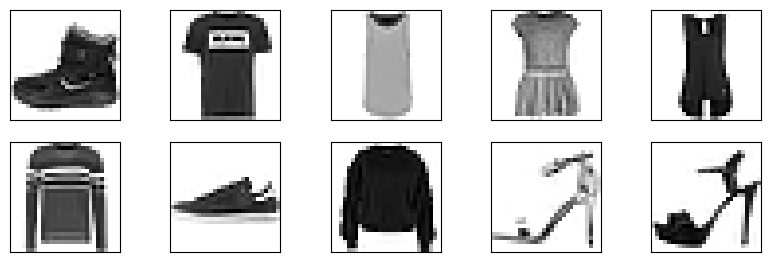

In [4]:
"""data view"""
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [5]:
"""Normalizing the data to a range between 0 and 1.  
I divide by 255 because pixel values range from 0 to 255.  
Scaling the pixel values helps the model learn faster and more effectively. """
x_train = x_train / 255.0  
x_test = x_test / 255.0  


<h2>3. Model Training</h2>
Here, I will use a machine learning approach with the Support Vector Classifier (SVC) algorithm because it is effective for classification tasks

In [6]:
"""Dictionary to store evaluation metrics for different algorithms."""
scores = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [7]:
"""Flattening the data from a 28x28 image format into a one-dimensional vector of size 1x784."""
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [8]:
"""model training"""
svc = SVC(probability=True).fit(x_train,y_train)

<h2>4. Model Evaluation</h4>

In [9]:
"""Making predictions with the SVC model and calculating evaluation metrics."""
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
precision = precision_score(y_test,y_pred, average='weighted')

scores["Algorithm"].append("SVC")
scores["Accuracy"].append(round(acc, 4))
scores["F1 Score"].append(round(f1, 4))
scores["Recall"].append(round(recall, 4))
scores["Precision"].append(round(precision, 4))

scores

{'Algorithm': ['SVC'],
 'Accuracy': [0.8828],
 'Precision': [0.8823],
 'Recall': [0.8828],
 'F1 Score': [0.8823]}

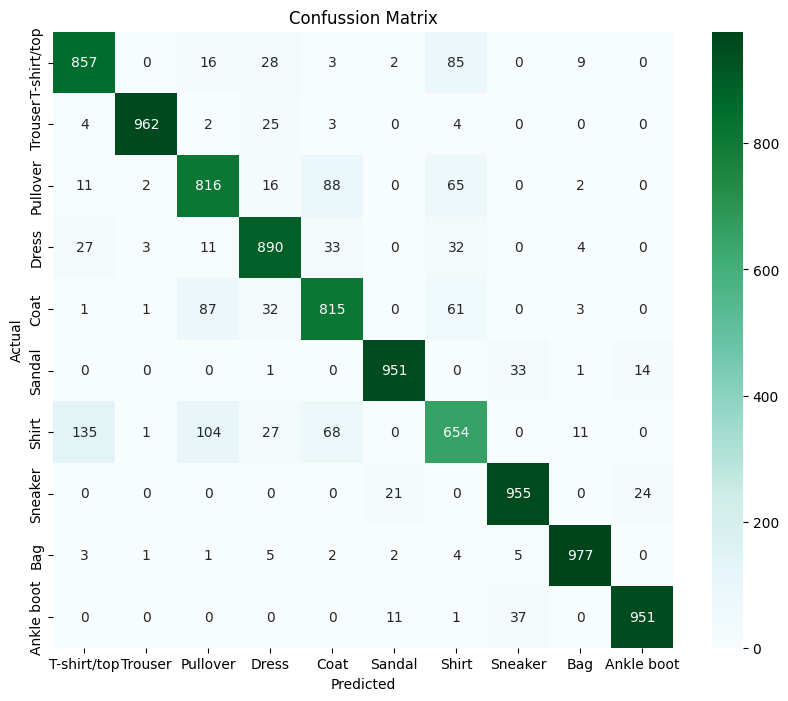

In [10]:
"""Confussion Matrix."""
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="BuGn", xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()
     

<h2>5. Save Model</h2>
Save model to pickle to load it later for inference.



In [12]:
"""Save the model to pickle file"""
joblib.dump(svc, os.path.join("..", "models", "svc","model.pkl"))
print("Model saved successfully!")

Model saved successfully!
